In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
file_path = 'flood_20years_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Information:")
print(data.info())
print("\nFirst 5 rows of the dataset:")
print(data.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 240 non-null    int64  
 1   Month                240 non-null    object 
 2   Rainfall_mm          240 non-null    int64  
 3   River_Water_Level_m  240 non-null    float64
 4   Temperature_C        240 non-null    float64
 5   Flood_Occurrence     240 non-null    int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 11.4+ KB
None

First 5 rows of the dataset:
   Year     Month  Rainfall_mm  River_Water_Level_m  Temperature_C  \
0  2004   January          102                 9.76          14.59   
1  2004  February           71                 7.59          13.90   
2  2004     March          466                 2.10          21.48   
3  2004     April          372                 7.61          27.70   
4  2004       May          

In [4]:
# Encode the 'Month' column (categorical to numerical)
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])

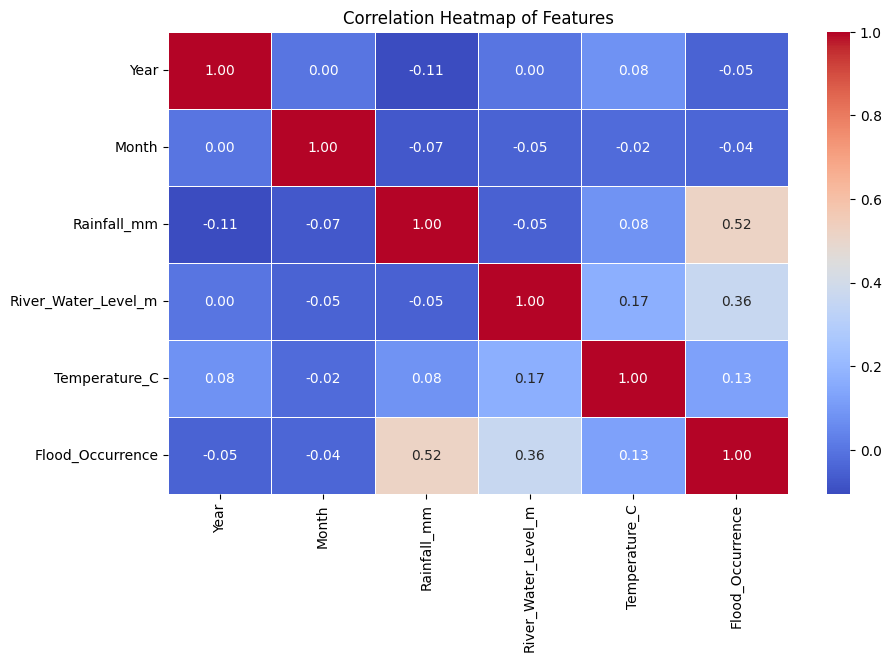

In [5]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [6]:
# Define Features (X) and Target (y)
X = data.drop(columns=['Flood_Occurrence'])  # All input features
y = data['Flood_Occurrence']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize the models
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(random_state=42)

# Train the Random Forest Classifier
print("\nTraining the Random Forest Classifier...")
rf_classifier.fit(X_train, y_train)

# Train the Support Vector Machine Classifier
print("\nTraining the SVM Classifier...")
svm_classifier.fit(X_train, y_train)


Training the Random Forest Classifier...

Training the SVM Classifier...


SVC(random_state=42)

In [8]:
# Predict on the test data using Random Forest
rf_y_pred = rf_classifier.predict(X_test)

# Predict on the test data using SVM
svm_y_pred = svm_classifier.predict(X_test)

# Calculate accuracy and classification report for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("\nRandom Forest Model Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

# Calculate accuracy and classification report for SVM
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("\nSVM Model Accuracy:", svm_accuracy)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_y_pred))


Random Forest Model Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        25

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48


SVM Model Accuracy: 0.8333333333333334

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        23
           1       0.95      0.72      0.82        25

    accuracy                           0.83        48
   macro avg       0.85      0.84      0.83        48
weighted avg       0.86      0.83      0.83        48



In [9]:
if rf_accuracy > svm_accuracy:
    print("\nRandom Forest has higher accuracy. Saving Random Forest model.")
    joblib.dump(rf_classifier, 'flood_prediction_random_forest.pkl')
else:
    print("\nSVM has higher accuracy. Saving SVM model.")
    joblib.dump(svm_classifier, 'flood_prediction_svm.pkl')


Random Forest has higher accuracy. Saving Random Forest model.


In [10]:
# Load the model with the higher accuracy
if rf_accuracy > svm_accuracy:
    loaded_model = joblib.load('flood_prediction_random_forest.pkl')
else:
    loaded_model = joblib.load('flood_prediction_svm.pkl')

In [11]:
# Prepare new sample data for prediction
new_data = pd.DataFrame({
    'Year': [2004],
    'Month': [5],  # Replace with the encoded month (e.g., April = 4 after encoding)
    'Rainfall_mm': [661],  # Example value
    'River_Water_Level_m': [1.62],  # Example value
    'Temperature_C': [28.05]  # Example value
})

# Make predictions
prediction = loaded_model.predict(new_data)
print("\nFlood Prediction Result:")
if prediction[0] == 1:
    print("Flood Occurrence: YES (Flood)")
else:
    print("Flood Occurrence: NO (No Flood)")


Flood Prediction Result:
Flood Occurrence: YES (Flood)
